# Homework 4: Data Visualization
- **Name**:  Palash Prakhar Gupta
- **UB Username**: pgupta23
- **UB Person Number**:  50485201

---
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Step 2: Read data from CSV file, ignoring lines starting with '%'
data = pd.read_csv('scatter_data.csv')

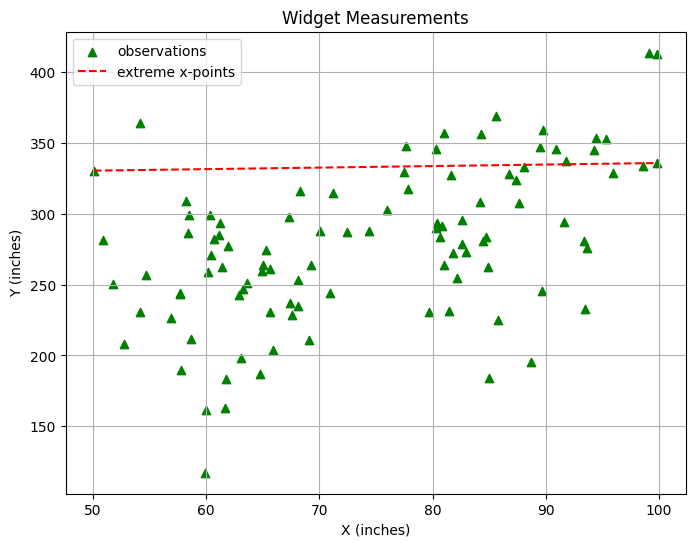

In [18]:
# Extract x and y values from the DataFrame
x1 = data['x']  # Replace 'x_column_name' with the actual column name in your CSV
y1 = data['y']  # Replace 'y_column_name' with the actual column name in your CSV

# Step 3: Create the scatterplot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(x1, y1, c='g', marker='^', label='observations')  # 'c' sets the color, 'marker' sets the marker style
plt.title('Widget Measurements')
plt.xlabel('X (inches)')
plt.ylabel('Y (inches)')
plt.legend()
plt.grid(True)

# Plot the red dashed line from the left-most point to the right-most point
min_x1 = min(x1)
max_x1 = max(x1)

# Plot a dashed red line from the left-most to the right-most point
plt.plot([min_x1, max_x1], [y1[x1.idxmin()], y1[x1.idxmax()]], 'r--', label='extreme x-points')

# Display the plot with the updated legend
plt.legend()
plt.grid(True)

# Display the plot or save it to a file
plt.show()

### Problem 2 - Histogram

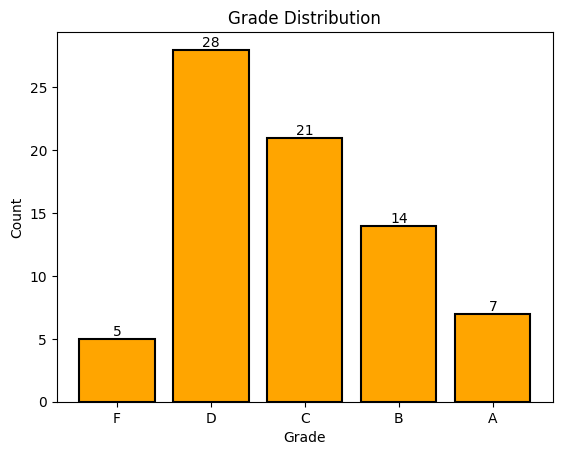

In [19]:
# Read the CSV file into a DataFrame
df = pd.read_csv('student_grades.csv')

# Create a function to assign grades
def assign_grade(score):
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score < 90:
        return 'B'
    elif 70 <= score < 80:
        return 'C'
    elif 60 <= score < 70:
        return 'D'
    else:
        return 'F'

# Apply the grade assignment function to create a new 'Grade' column
df['Grade'] = df['avgScore'].apply(assign_grade)

# Create a histogram based on the grades
grade_counts = df['Grade'].value_counts().sort_index()
grades = ['F', 'D', 'C', 'B', 'A']

# Define bar color and edge color
bar_color = 'orange'
edge_color = 'black'

bars = plt.bar(grades, grade_counts, color=bar_color, edgecolor=edge_color, linewidth=1.5)

# Add counts above each bar
for bar, count in zip(bars, grade_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

# Customize the plot
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.grid(False)

# Show the histogram
plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

In [20]:
df = pd.read_csv('solution_data.csv')

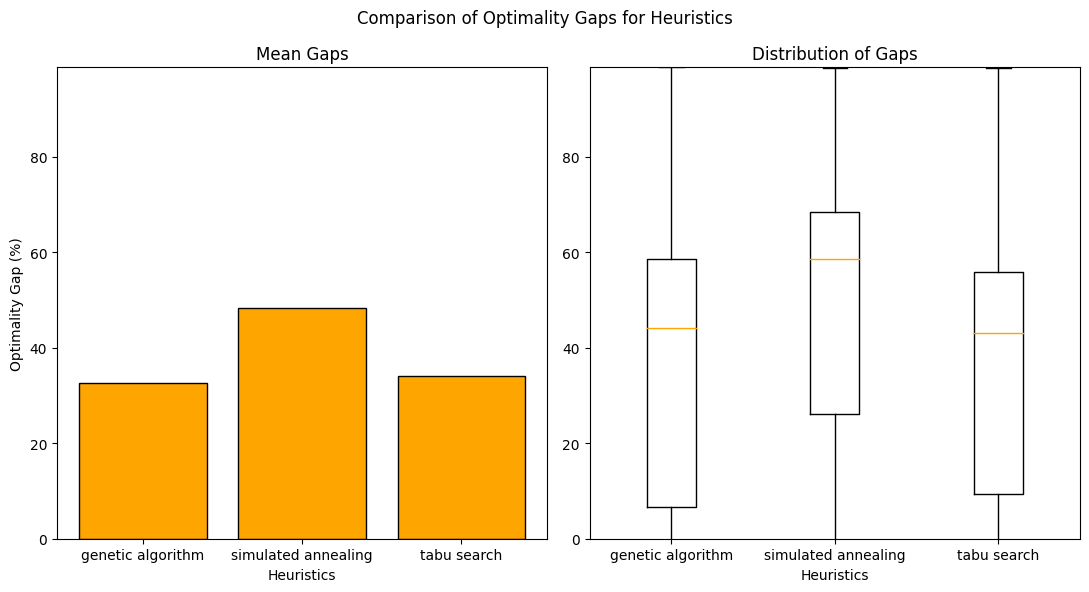

In [21]:

# Calculate the optimality gap for each row
optimal_ofv = df[df['SolnMethod'] == 'optimal']['Value'].mean()
df['OptimalityGap'] = ((optimal_ofv - df['Value']) / optimal_ofv) * 100

# Define the order of heuristics
heuristic_order = ["genetic algorithm", "simulated annealing", "tabu search"]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

# Subplot 1: Barplot
average_gaps = df.groupby('SolnMethod')['OptimalityGap'].mean()[heuristic_order]
#average_gaps[average_gaps < 0] = 0  # Set negative values to 0
ax1.bar(heuristic_order, average_gaps, color='orange', edgecolor='black')
ax1.set_xlabel('Heuristics')
ax1.set_ylabel('Optimality Gap (%)')
ax1.set_title('Mean Gaps')

# Subplot 2: Boxplot
ax2.boxplot([df[df['SolnMethod'] == h]['OptimalityGap'] for h in heuristic_order], medianprops={'color': 'orange'})
ax2.set_xticklabels(heuristic_order)
ax2.set_xlabel('Heuristics')
ax2.set_title('Distribution of Gaps')

# Set the same y-axis scale for both subplots
max_gap = df['OptimalityGap'].max()
ax1.set_ylim(0, max_gap)
ax2.set_ylim(0, max_gap)

# Display the plot
plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout()
plt.show()


---
## Part 2 - Explore New Plot Types

The correlation heatmap shows the correlation between six variables: fruit_label, mass, width, height, color_score, and fruit_label. The heatmap is shaded from red to blue, with red indicating a positive correlation and blue indicating a negative correlation. The values in the heatmap range from -1 to 1, with 1 indicating a perfect positive correlation and -1 indicating a perfect negative correlation.

Here are some of the key findings from the heatmap:

* There is a strong positive correlation between fruit_label and height (0.5). This means that taller fruits are more likely to be labeled as a particular type of fruit.
* There is a strong negative correlation between fruit_label and color_score (-0.8). This means that fruits with a higher color_score are less likely to be labeled as a particular type of fruit.
* There is a weak positive correlation between mass and height (0.024). This means that taller fruits tend to be slightly heavier.
* There is a weak negative correlation between mass and color_score (-0.014). This means that fruits with a higher color_score tend to be slightly lighter.
* There is a weak positive correlation between width and height (0.35). This means that taller fruits tend to be slightly wider.
* There is a weak negative correlation between width and color_score (-0.13). This means that fruits with a higher color_score tend to be slightly narrower.

Overall, the correlation heatmap suggests that there is a relationship between the six variables, but the relationships are not always strong.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/many_pairwise_correlations.html,
- **URL of Sample Data**:  https://www.kaggle.com/code/ankumagawa/knnclassification-3d-scatter-plot-fruit-data/input

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruit= pd.read_csv('fruit_data_with_colors _1_.csv')
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [ ]:
#examine the null variable
fruit.isnull().sum()

#replace the missing data by the average of its column
fruit['mass']=fruit['mass'].fillna(fruit['mass'].mean())
fruit['height']=fruit['height'].fillna(fruit['height'].mean())

fruit.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

<ipython-input-68-000e39b37c05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fruit.corr()


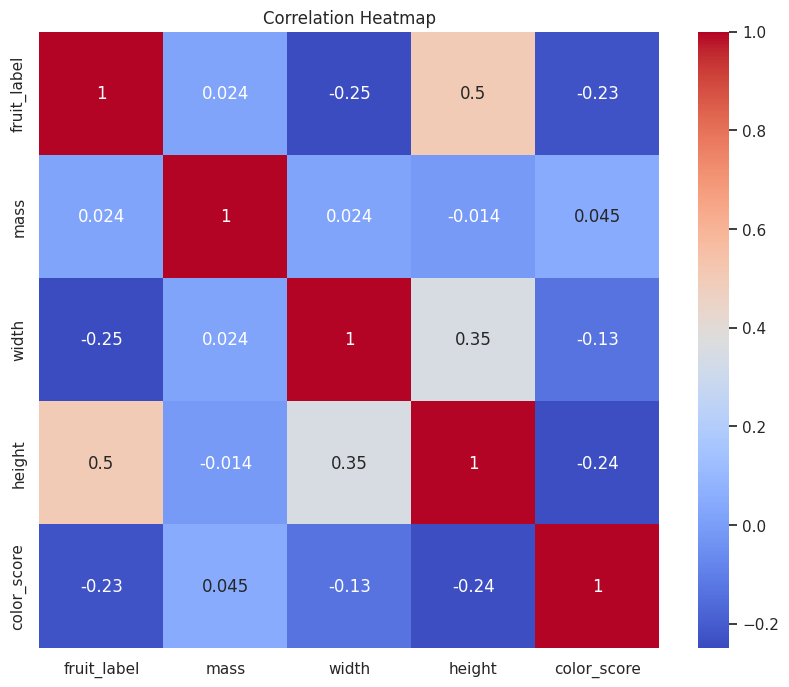

In [ ]:
# Create a correlation matrix for the numeric columns
correlation_matrix = fruit.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

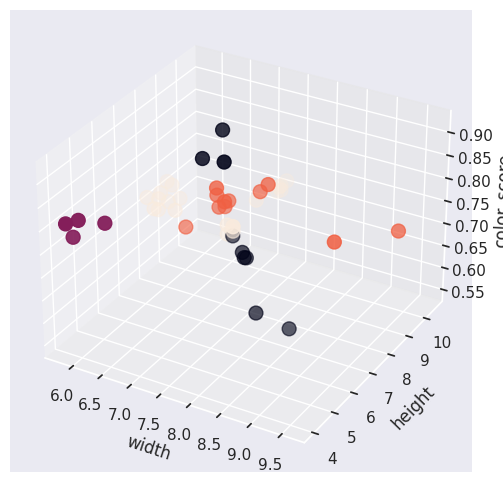

In [ ]:
X = fruit[['height', 'width', 'mass', 'color_score']]
y = fruit['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()